## Project 2 - Ames Housing Data and Kaggle Challenge


### Problem Statement: What impacts the housing prices? Features to improve to get the best value for the house.

#### By- Bhupesh Kumar

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score


## Display all columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### Reading Training data

In [2]:
df_train = pd.read_csv('datasets/train.csv')
print(df_train.shape)
df_train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


    The training data has 2051 rows and 81 columns. 
    Out of 81 columns : 23 are nominal, 23 ordinal, 14 discrete, and 20 continuous and 2 identifiers. 

#### Reading Test Data 

In [3]:
df_test = pd.read_csv('datasets/test.csv')
print(df_test.shape)
df_test.head()

(879, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


    Test data has 879 rows, 80 columns. 
    It has less rows of data because I will training and testing againts that data set.
    It also does not include the sale price because that's what I am trying to predict with my model.

# EDA

In [4]:
df_train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

    Looking at the data types, the columns are mix of data types which includes objects, ints and floats. 
    
    

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


    Describe feature gives me the summary statistics on numeric column such as mean, std, min ,25%, 50%, 75%, max the counts. 
    
    Looking at the counts above, I can tell many columns are missing values. Next cell will show all the missing/null values for numeric and categorical columns. 

In [6]:
df_train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [7]:
df_train.isnull().sum().sum()

9822

    Out of 81 columns, 26 columns has missing/nan values. 
    9882 values are missing/nan from dataset of 2051 * 81 = 166,131
    
    How to deal with missing/nan values?
    Best approach is go column by column and clean them or drop them. 

#### Cleaning the dataset column by column

    Before start cleaning the data itself, I want to change the columns names. Replace empty sapce ' ' with '_' .
    Also, make column names lower case.

#### Training Data

In [8]:
df_train.columns = df_train.columns.str.replace(' ', '_')
df_train.columns = df_train.columns.str.lower().str.rstrip()
df_train.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


#### Testing data

In [9]:
df_test.columns = df_test.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.lower().str.rstrip()
df_test.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [10]:
# Column Names
df_train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [11]:
# Names of the columns with null values 
df_train.columns[df_train.isnull().any()].tolist()

['lot_frontage',
 'alley',
 'mas_vnr_type',
 'mas_vnr_area',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

######  Lot Frontage (continuous) : Linear feet of street connected to property  
Train Data

In [13]:
df_train['lot_frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: lot_frontage, dtype: float64

In [14]:
df_train['lot_frontage'].mean()

69.05520046484602

In [15]:
df_train['lot_frontage'] = df_train['lot_frontage'].fillna(df_train['lot_frontage'].mean())

In [16]:
df_train['lot_frontage'].describe()

count    2051.000000
mean       69.055200
std        21.306357
min        21.000000
25%        60.000000
50%        69.055200
75%        78.000000
max       313.000000
Name: lot_frontage, dtype: float64

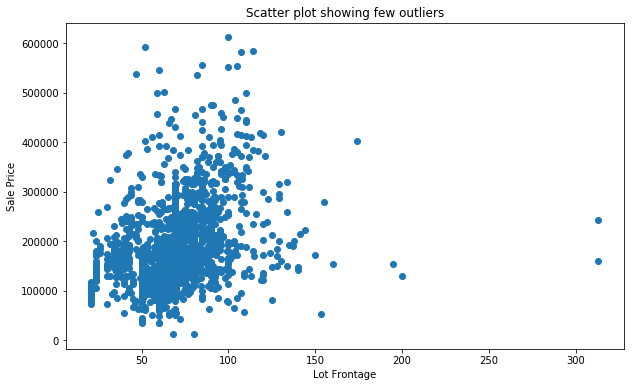

In [17]:
# Plot for Lot Frontage 
plt.figure(figsize =(10,6))

plt.scatter(x = df_train['lot_frontage'], y = df_train['saleprice'])
plt.title('Scatter plot showing few outliers')
plt.xlabel('Lot Frontage')
plt.ylabel("Sale Price");

    The Lot frontage had 330 missing data values, which is far too many data points to drop.
    So, I replaced nan values with meadian of the total column (69.055200).

#### Alley (Nominal) : Type of alley access to property
Train Data

In [18]:
# Counts of values
df_train['alley'].value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [19]:
# Checking Missing Values
df_train['alley'].isnull().sum()

1911

In [20]:
df_train['alley'] = df_train['alley'].fillna('None')

In [21]:
df_train['alley'].value_counts()

None    1911
Grvl      85
Pave      55
Name: alley, dtype: int64

    There are far too many missing values in the both datasets, over 90 %. There is no use for this column
    in the our dataset. I could delete the column but i will just fill NAN with No Alley

#### Mas Vnr Type (Nominal) : Masnory Veneer Type
Train Data

In [22]:
df_train['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [23]:
df_train['mas_vnr_type'].isnull().sum()

22

In [24]:
df_train['mas_vnr_type'] = df_train['mas_vnr_type'].fillna('None')
df_train['mas_vnr_type'].value_counts()

None       1240
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

    Masonry var type data was nearly 60% None, it doesn't mean the data was missing, it's just means that alot of
    properties don't have any masonry data. Therefore, I did not drop the 22 NAN values, I just replaced it 
    with highest average of data which is 'None'. 

#### Mas Vnr Area (continuous) : Masnory Veneer area in square feet
Train Data

In [25]:
df_train['mas_vnr_area'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: mas_vnr_area, dtype: float64

In [26]:
df_train['mas_vnr_area'].value_counts().head()

0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
Name: mas_vnr_area, dtype: int64

In [27]:
df_train['mas_vnr_area'].isnull().sum()

22

In [28]:
df_train['mas_vnr_area'] = df_train['mas_vnr_area'].fillna(0.0)

In [29]:
df_train['mas_vnr_area'].value_counts().head()

0.0      1238
120.0      11
176.0      10
200.0      10
180.0       9
Name: mas_vnr_area, dtype: int64

    Eventhough Mas Vnr Area is Continuous and have float values, I could reaplce NAN values with mean or median.
    But it won't be consistent with Mas Vnr type. Both columns had equal amount of missing data. 

#### Bsmt Qual (Ordinal) : Evaluates the height of the basement
Train Data

In [30]:
df_train['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [31]:
df_train['bsmt_qual'].isnull().sum()

55

In [32]:
df_train['bsmt_qual'] = df_train['bsmt_qual'].fillna('None')

In [33]:
df_train['bsmt_qual'].value_counts()

TA      887
Gd      864
Ex      184
Fa       60
None     55
Po        1
Name: bsmt_qual, dtype: int64

    I had to think a alot about this feature because, there is only 55 missing values and that's less then 5 % 
    of the data set. So I could have dropped them but I looked at data dictionary, it shows NA for hours not having
    a basement at all. Therefore, I filled that in with 'None'. I will do the same with rest of Basement varibles
    below.

#### Bsmt Cond (Ordinal) : Evaluates the general condition of the basement
Train data

In [34]:
df_train['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [35]:
df_train['bsmt_cond'].isnull().sum()

55

In [36]:
df_train['bsmt_cond'] = df_train['bsmt_cond'].fillna('None')

In [37]:
df_train['bsmt_cond'].value_counts()

TA      1834
Gd        89
Fa        65
None      55
Po         5
Ex         3
Name: bsmt_cond, dtype: int64

#### Bsmt Exposure (ordinal) : Refers to walkout or garden level walls
Train data

In [38]:
df_train['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [39]:
df_train['bsmt_exposure'].isnull().sum()

58

In [40]:
df_train['bsmt_exposure'] = df_train['bsmt_exposure'].fillna('None')

In [41]:
df_train['bsmt_exposure'].value_counts()

No      1339
Av       288
Gd       203
Mn       163
None      58
Name: bsmt_exposure, dtype: int64

#### Bsmt Fin Type 1 (ordinal): Rating of basement finished area


In [42]:
df_train['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [43]:
df_train['bsmtfin_type_1'].isnull().sum()

55

In [44]:
df_train['bsmtfin_type_1'] = df_train['bsmtfin_type_1'].fillna('None')

In [45]:
df_train['bsmtfin_type_1'].value_counts()

GLQ     615
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     55
Name: bsmtfin_type_1, dtype: int64

#### BsmtFin SF 1 (continuous): Type 1 finished square feet

In [46]:
df_train['bsmtfin_sf_1'].describe()

count    2050.000000
mean      442.300488
std       461.204124
min         0.000000
25%         0.000000
50%       368.000000
75%       733.750000
max      5644.000000
Name: bsmtfin_sf_1, dtype: float64

In [47]:
df_train['bsmtfin_sf_1'].isnull().sum()

1

In [48]:
df_train['bsmtfin_sf_1'] = df_train['bsmtfin_sf_1'].fillna(442.30)

    Since this is continuous variable, I changed the Null value with the mean.

#### BsmtFinType2 (ordinal): Rating of basement finished area
Train

In [49]:
df_train['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [50]:
df_train['bsmtfin_type_2'].isnull().sum()

56

In [51]:
df_train['bsmtfin_type_2'] = df_train['bsmtfin_type_2'].fillna('None')

In [52]:
df_train['bsmtfin_type_2'].value_counts()

Unf     1749
Rec       80
LwQ       60
None      56
BLQ       48
ALQ       35
GLQ       23
Name: bsmtfin_type_2, dtype: int64

#### Bsmtfin Sf 2 (continous) : Type 2 finsihed square ft

In [53]:
df_train['bsmtfin_sf_2'].describe()

count    2050.000000
mean       47.959024
std       165.000901
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: bsmtfin_sf_2, dtype: float64

In [54]:
df_train['bsmtfin_sf_2'].isnull().sum()

1

In [55]:
df_train['bsmtfin_sf_2'] = df_train['bsmtfin_sf_2'].fillna(47.95)

#### Bsmt Unf Sf  (continous) : Unfinsished Square feet area 

In [56]:
df_train['bsmt_unf_sf'].describe()

count    2050.000000
mean      567.728293
std       444.954786
min         0.000000
25%       220.000000
50%       474.500000
75%       811.000000
max      2336.000000
Name: bsmt_unf_sf, dtype: float64

In [57]:
df_train['bsmt_unf_sf'].isnull().sum()

1

In [58]:
df_train['bsmt_unf_sf'] = df_train['bsmt_unf_sf'].fillna(567.72)

#### Total Basemnt Sf (continous) : Total Square feet basement area

In [59]:
df_train['total_bsmt_sf'].describe()

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: total_bsmt_sf, dtype: float64

In [60]:
df_train['total_bsmt_sf'].isnull().sum()

1

In [61]:
df_train['total_bsmt_sf'] = df_train['total_bsmt_sf'].fillna(1057.98)

#### Bsmt Full bath (Discrete): Basement Full bath

In [62]:
df_train['bsmt_full_bath'].value_counts()

0.0    1200
1.0     824
2.0      23
3.0       2
Name: bsmt_full_bath, dtype: int64

In [63]:
df_train['bsmt_full_bath'].isnull().sum()

2

In [64]:
df_train['bsmt_full_bath'] = df_train['bsmt_full_bath'].fillna(0.0)

#### Bsmt Half bath (Discrete): Basement half bath

In [65]:
df_train['bsmt_half_bath'].value_counts()

0.0    1923
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64

In [66]:
df_train['bsmt_half_bath'].isnull().sum()

2

In [67]:
df_train['bsmt_half_bath'] = df_train['bsmt_half_bath'].fillna(0.0)

#### FireplaceQu (ordinal) : Fireplace quality
Train Data

In [68]:
df_train['fireplace_qu'].value_counts()

Gd    523
TA    407
Fa     59
Ex     31
Po     31
Name: fireplace_qu, dtype: int64

In [69]:
df_train['fireplace_qu'].isnull().sum()

1000

In [70]:
df_train['fireplace_qu'] = df_train['fireplace_qu'].fillna('None')

In [71]:
df_train['fireplace_qu'].value_counts()

None    1000
Gd       523
TA       407
Fa        59
Ex        31
Po        31
Name: fireplace_qu, dtype: int64

    According to the dictionary there is no firepalce therefore, filled with None

#### Garage type (Nominal) : Garage Location
Train data

In [72]:
df_train['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [73]:
df_train['garage_type'].isnull().sum()

113

In [74]:
df_train['garage_type'] = df_train['garage_type'].fillna('None')

In [75]:
df_train['garage_type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

    Null values again filled with None because there is no garage

#### Garage yr blt(Discret) : Year garage was built
Train Data

In [76]:
df_train['garage_yr_blt'].value_counts()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1958.0     32
1950.0     32
1968.0     32
1996.0     31
1956.0     31
1966.0     29
2001.0     27
1965.0     27
1995.0     26
1967.0     26
1997.0     26
1994.0     25
1964.0     25
1962.0     25
1975.0     25
1979.0     25
1954.0     25
1959.0     23
1992.0     22
1980.0     22
1963.0     22
1990.0     21
1920.0     21
1960.0     21
1970.0     20
1930.0     20
1973.0     20
1957.0     20
1940.0     20
1961.0     20
1953.0     19
1974.0     19
1971.0     18
1969.0     18
1972.0     17
2009.0     17
1939.0     16
1987.0     16
1955.0     15
1988.0     14
1948.0     14
1989.0     12
1985.0     12
1951.0     12
1981.0     11
1984.0     11
1952.0     10
1941.0     10
1991.0     10
1949.0     10
1986.0     10
1945.0     10
1926.0      8
1935.0      7
1983.0      7
1936.0      7
1922.0      6
1925.0

In [77]:
df_train['garage_yr_blt'].isnull().sum()

114

In [78]:
df_train['garage_yr_blt'] = df_train['garage_yr_blt'].fillna(0.0)

In [79]:
df_train['garage_yr_blt'].value_counts()

0.0       114
2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
1977.0     46
1998.0     45
2008.0     44
2000.0     41
2002.0     40
1999.0     39
1976.0     35
1993.0     34
1978.0     33
1950.0     32
1968.0     32
1958.0     32
1996.0     31
1956.0     31
1966.0     29
2001.0     27
1965.0     27
1995.0     26
1967.0     26
1997.0     26
1979.0     25
1962.0     25
1954.0     25
1964.0     25
1975.0     25
1994.0     25
1959.0     23
1992.0     22
1980.0     22
1963.0     22
1960.0     21
1990.0     21
1920.0     21
1961.0     20
1973.0     20
1970.0     20
1940.0     20
1930.0     20
1957.0     20
1953.0     19
1974.0     19
1969.0     18
1971.0     18
1972.0     17
2009.0     17
1939.0     16
1987.0     16
1955.0     15
1948.0     14
1988.0     14
1989.0     12
1951.0     12
1985.0     12
1984.0     11
1981.0     11
1991.0     10
1986.0     10
1941.0     10
1945.0     10
1949.0     10
1952.0     10
1926.0      8
1935.0      7
1936.0      7
1983.0      7
1925.0

        This variable was kind of tricky because it's a discrete value, and alot of houses don't have garages.
        I didn't want to drop 114 rows because, it give usefull information for other columns. Therefore, 
        I replaced null value here with 0.0

#### Garage finsih(ordinal) : Interior finish of the garage

In [80]:
df_train['garage_finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: garage_finish, dtype: int64

In [81]:
df_train['garage_finish'].isnull().sum()

114

In [82]:
df_train['garage_finish'] = df_train['garage_finish'].fillna('None')

    Same as before, replaced null value with None. 

#### Garage cars 

In [83]:
df_train['garage_cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: garage_cars, dtype: int64

In [84]:
df_train['garage_cars'].isnull().sum()

1

In [85]:
df_train['garage_cars'] = df_train['garage_cars'].fillna(2.0)

    This variable was missing just one value. Instead of dropping the row and losing data on other columns,
    I simply replaced it with high occuring value which is 2.0

#### Garage Area

In [86]:
df_train['garage_area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: garage_area, dtype: float64

In [87]:
df_train['garage_area'].isnull().sum()

1

In [88]:
df_train['garage_area'] = df_train['garage_area'].fillna(473.67)

    I replaced the garage area with mean, since there was only 1 null value. 

#### Garage qual

In [89]:
df_train['garage_qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: garage_qual, dtype: int64

In [90]:
df_train['garage_qual'].isnull().sum()

114

In [91]:
df_train['garage_qual'] = df_train['garage_qual'].fillna('None')

    All of the garage features missing 114 value. They don't have a garage at all so replaced it with None

#### Garage Condition


In [92]:
df_train['garage_cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [93]:
df_train['garage_cond'].isnull().sum()

114

In [94]:
df_train['garage_cond'] = df_train['garage_cond'].fillna('None')

    Same as before on garage, I replaced it with None.

#### Pool Qc(ordinal): pool quality
Train Data

In [95]:
df_train['pool_qc'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: pool_qc, dtype: int64

In [96]:
df_train['pool_qc'].isnull().sum()

2042

In [97]:
df_train['pool_qc'] = df_train['pool_qc'].fillna('None')

    pool quality is missing 99 % of values. It simply not there so replaced it with None

#### Fence (Ordinal) : Fence Quality
Train Data

In [98]:
df_train['fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [99]:
df_train['fence'].isnull().sum()

1651

In [100]:
df_train['fence'] = df_train['fence'].fillna('None')

    Some of the house don't have fence, so replaced it with None.

#### Misc Feature (Nominal): Miscellaneous feature not covered in other categories
Train Data

In [101]:
df_train['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: misc_feature, dtype: int64

In [102]:
df_train['misc_feature'] = df_train['misc_feature'].fillna('None')

    Misc Features were also replaced with None for null values. Kept it all consistent with all the other 
    variables. 

#### Check all the null values again in the Train data frame 

In [322]:
df_train.isnull().sum().sum()

0

        Since i have cleaned up the Train date in specific way, i would have to do the same with Test data
        for kaggle. 

#### Clean the NAN values in Testing Dataset 

In [104]:
df_test['lot_frontage'] = df_test['lot_frontage'].fillna(df_test['lot_frontage'].mean())
df_test['alley'] = df_test['alley'].fillna('None')
df_test['mas_vnr_type'] = df_test['mas_vnr_type'].fillna('None')
df_test['mas_vnr_area'] = df_test['mas_vnr_area'].fillna(0.0)
df_test['bsmt_qual'] = df_test['bsmt_qual'].fillna('None')
df_test['bsmt_cond'] = df_test['bsmt_cond'].fillna('None')
df_test['bsmt_exposure'] = df_test['bsmt_exposure'].fillna('None')
df_test['bsmtfin_type_1'] = df_test['bsmtfin_type_1'].fillna('None')
df_test['bsmtfin_type_2'] = df_test['bsmtfin_type_2'].fillna('None')
df_test['fireplace_qu'] = df_test['fireplace_qu'].fillna('None')
df_test['garage_type'] = df_test['garage_type'].fillna('None')
df_test['garage_yr_blt'] = df_test['garage_yr_blt'].fillna(0.0)
df_test['garage_finish'] = df_test['garage_finish'].fillna('None')
df_test['garage_qual'] = df_test['garage_qual'].fillna('None')
df_test['garage_cond'] = df_test['garage_cond'].fillna('None')
df_test['pool_qc'] = df_test['pool_qc'].fillna('None')
df_test['fence'] = df_test['fence'].fillna('None')
df_test['misc_feature'] = df_test['misc_feature'].fillna('None')
df_test['electrical'] = df_test['electrical'].fillna('SBrkr')

    I made same changed to the test data as i did to train data. I didn't need to go through every column one
    by one because they have same values.

#### Check all the null values again in the Test data frame

In [324]:
df_test.isnull().sum().sum()

0

    Now that all the null values are taken care of, I can now begin to start visualizing diffeent features

#### Target Variable 

In [106]:
df_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

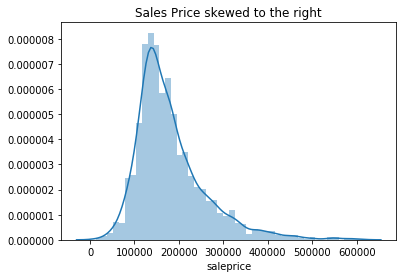

In [107]:
sns.distplot(df_train['saleprice']).set_title('Sales Price skewed to the right');

In [108]:
# Corrleation Between all the sale price and all numeric columns (in Percent)
df_train.corr()[['saleprice']].sort_values('saleprice') *100

,saleprice
pid,-25.505190
enclosed_porch,-13.565649
kitchen_abvgr,-12.544352
overall_cond,-9.701891
ms_subclass,-8.733545
id,-5.139785
bsmt_half_bath,-4.529027
low_qual_fin_sf,-4.159430
yr_sold,-1.520322
misc_val,-0.737476


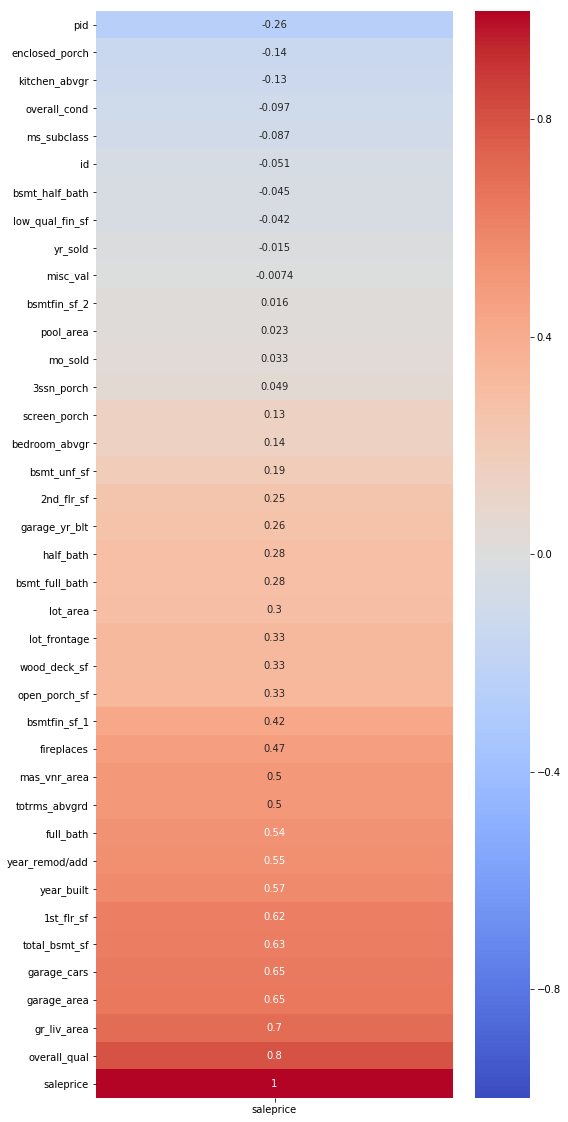

In [109]:
# Let's visulizate the corrlation using the Heat Map
plt.figure(figsize =(8,20))
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice'), 
            annot=True, 
            cmap='coolwarm',
           vmin =-1);

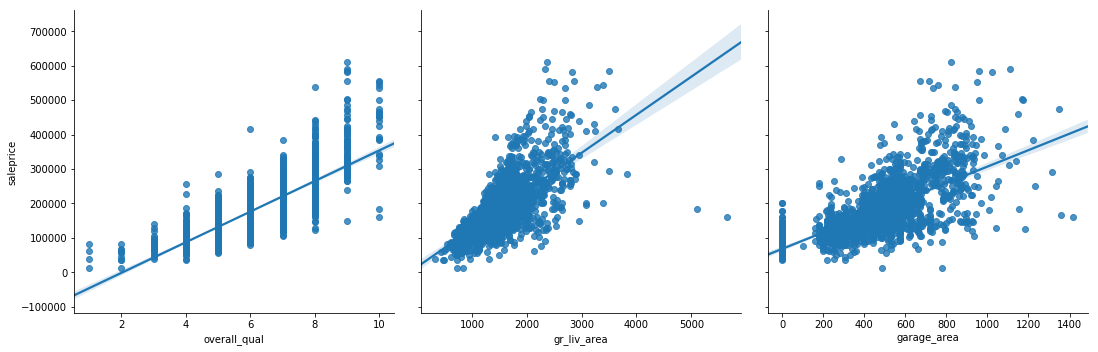

In [110]:
# Pair plot with top 3 high corrlated features 
sns.pairplot(df_train,
             height=5,
             x_vars=['overall_qual','gr_liv_area','garage_area'], y_vars=['saleprice'],
            kind ='reg');

    So we can see which features makes the most impact on the sale price. Let's look at few more features. 

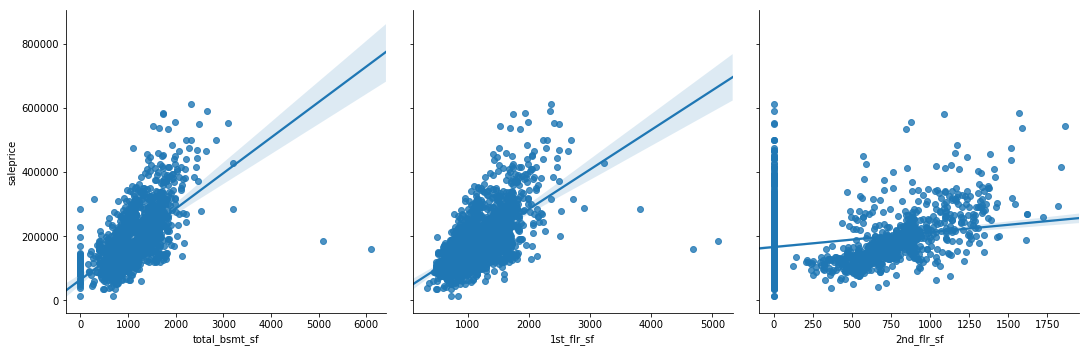

In [111]:
sns.pairplot(df_train,
             height=5,
             x_vars=['total_bsmt_sf','1st_flr_sf','2nd_flr_sf'], y_vars=['saleprice'],
            kind ='reg');

       Total Basement square ft and 1st floor square ft are is much lineat to the sale price then 2nd floor
       square ft. 

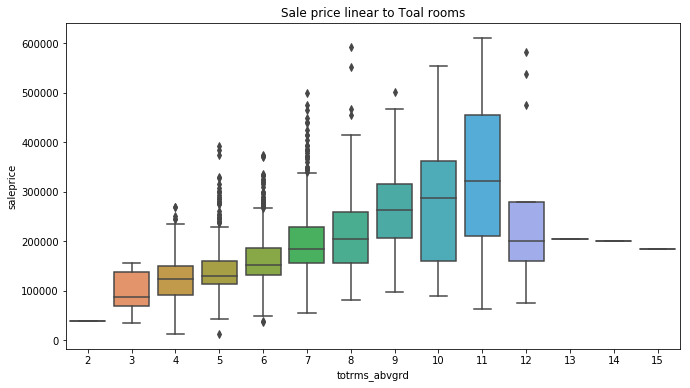

In [113]:
# Plot boxplots of the sale price vs total Room above ground
fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(x='totrms_abvgrd', y='saleprice', data=df_train, orient = 'v', ax=ax).set_title('Sale price linear to Toal rooms')
plt.show()

In [114]:
df_train['mo_sold'].value_counts()

6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: mo_sold, dtype: int64

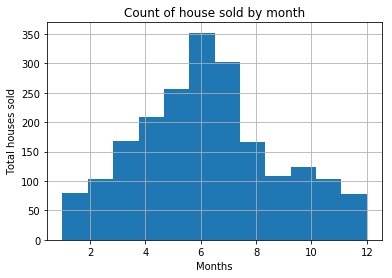

In [115]:
df_train.mo_sold.hist(bins = 12)
plt.title('Count of house sold by month')
plt.xlabel('Months')
plt.ylabel('Total houses sold')
plt.show()

    54% of houses are sold between months of April, May, June, and July.  
    April - 208
    May - 257
    June -352
    July -303 
    
    4 moths total = 1120
    

#### Changing varibales contain ranking to ordinal values
    Column names : External quality, external condition, basement quality, basement condition,heating quality,
    kitchen quality, fireplace quality, garage quality, garage condition, pool quality.


Train Data

In [117]:
rank = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}

In [118]:
df_train['exter_qual'] = df_train['exter_qual'].map(rank) #External Quality
df_train['exter_cond'] = df_train['exter_cond'].map(rank) # External condition
df_train['bsmt_qual'] = df_train['bsmt_qual'].map(rank) # Basement quality
df_train['bsmt_cond'] = df_train['bsmt_cond'].map(rank) # Basement Condition
df_train['heating_qc'] = df_train['heating_qc'].map(rank) # Heating quality
df_train['kitchen_qual'] = df_train['kitchen_qual'].map(rank) # Kitchen quality
df_train['fireplace_qu'] = df_train['fireplace_qu'].map(rank) # Fireplace quality 
df_train['garage_qual'] = df_train['garage_qual'].map(rank) # Garage quality 
df_train['garage_cond'] = df_train['garage_cond'].map(rank) # Garage Condition
df_train['pool_qc'] = df_train['pool_qc'].map(rank) # Pool quality


Test Data

In [120]:
df_test['exter_qual'] = df_test['exter_qual'].map(rank) #External Quality
df_test['exter_cond'] = df_test['exter_cond'].map(rank) # External condition
df_test['bsmt_qual'] = df_test['bsmt_qual'].map(rank) # Basement quality
df_test['bsmt_cond'] = df_test['bsmt_cond'].map(rank) # Basement Condition
df_test['heating_qc'] = df_test['heating_qc'].map(rank) # Heating quality
df_test['kitchen_qual'] = df_test['kitchen_qual'].map(rank) # Kitchen quality
df_test['fireplace_qu'] = df_test['fireplace_qu'].map(rank) # Fireplace quality 
df_test['garage_qual'] = df_test['garage_qual'].map(rank) # Garage quality 
df_test['garage_cond'] = df_test['garage_cond'].map(rank) # Garage Condition
df_test['pool_qc'] = df_test['pool_qc'].map(rank) # Pool quality

        Each varibale above has a ranking which measures mainly the quality and condition of the property.
        They are going to be very useful predicting the price of the house. 

#### Categorical data

Creating Dummies for Nomial Data

#### Ms Zoning(Nominal) : Identifies the general zoning classification of the sale

In [124]:
df_train['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [125]:
ms_zoning_dummy = pd.get_dummies(df_train['ms_zoning'])
df_train = pd.concat([df_train, ms_zoning_dummy], axis=1)

In [126]:
ms_zoning_dummy = pd.get_dummies(df_test['ms_zoning'])
df_test = pd.concat([df_test, ms_zoning_dummy], axis=1)

#### Lot Shape (ordinal) : General Shape of property

In [128]:
lot_shape_dummy = pd.get_dummies(df_train['lot_shape'])
df_train = pd.concat([df_train, lot_shape_dummy], axis=1)

In [129]:
lot_shape_dummy = pd.get_dummies(df_test['lot_shape'])
df_test = pd.concat([df_test, lot_shape_dummy], axis=1)

#### Neighborhood (Nominal) : Pysical Locations within Ames city limits

In [131]:
neighborhood_dummy = pd.get_dummies(df_train['neighborhood'])
df_train = pd.concat([df_train, neighborhood_dummy], axis=1)

In [132]:
neighborhood_dummy = pd.get_dummies(df_test['neighborhood'])
df_test = pd.concat([df_test, neighborhood_dummy], axis=1)

#### Building Type (Nominal): Type of Dwelling

In [134]:
bldy_type_dummy = pd.get_dummies(df_train['bldg_type'])
df_train = pd.concat([df_train, bldy_type_dummy], axis=1)

In [135]:
bldy_type_dummy = pd.get_dummies(df_test['bldg_type'])
df_test = pd.concat([df_test, bldy_type_dummy], axis=1)

#### House Style(Nominal): Style of Dwelling

In [137]:
house_style_dummy = pd.get_dummies(df_train['house_style'])
df_train = pd.concat([df_train, house_style_dummy], axis=1)

In [138]:
house_style_dummy = pd.get_dummies(df_test['house_style'])
df_test = pd.concat([df_test, house_style_dummy], axis=1)

#### Condition 1 (Nominal) : Proximity to various conditions 

In [140]:
condition_one_dummy = pd.get_dummies(df_train['condition_1'])
df_train = pd.concat([df_train, condition_one_dummy], axis=1)

In [141]:
condition_one_dummy = pd.get_dummies(df_test['condition_1'])
df_test = pd.concat([df_test, condition_one_dummy], axis=1)

#### Exterior 1 (Nominal): Exterior covering on the house

In [143]:
exterior_one_dummy = pd.get_dummies(df_train['exterior_1st'])
df_train = pd.concat([df_train, exterior_one_dummy], axis=1)

In [144]:
exterior_one_dummy = pd.get_dummies(df_test['exterior_1st'])
df_test = pd.concat([df_test, exterior_one_dummy], axis=1)

    After adding all the other features and dummies in the dataset, let's look at the head to double check
    it got concat correctly. 

In [145]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,A (agr),C (all),FV,I (all),RH,RL,RM,IR1,IR2,IR3,Reg,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing
0,109,533352170,60,RL,69.0552,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,5,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,3,3,Y,0,44,0,0,0,0,0,None,None,0,3,2010,WD,130500,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,5,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,Typ,1,3,Attchd,1997.0,RFn,2.0,559.0,3,3,Y,0,74,0,0,0,0,0,None,None,0,4,2009,WD,220000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,153,535304180,20,RL,68.0000,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,3,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,3,3,Y,0,52,0,0,0,0,0,None,None,0,1,2010,WD,109000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,318,916386060,60,RL,73.0000,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,4,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,3,3,Y,100,0,0,0,0,0,0,None,None,0,4,2010,WD,174000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,255,906425045,50,RL,82.0000,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,3,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,3,3,N,0,59,0,0,0,0,0,None,None,0,3,2010,WD,138500,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [146]:
df_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,C (all),FV,I (all),RH,RL,RM,IR1,IR2,IR3,Reg,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,AsbShng,AsphShn,BrkComm,BrkFace,CemntBd,HdBoard,MetalSd,Plywood,PreCast,Stucco,VinylSd,Wd Sdng,WdShing
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,No,Unf,0,Unf,0,1020,1020,GasA,4,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,2,9,Typ,0,0,Detchd,1910,Unf,1,440,1,1,Y,0,60,112,0,0,0,0,None,None,0,4,2006,WD,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,RL,69.630042,9662,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,Unf,0,Unf,0,1967,1967,GasA,3,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,3,10,Typ,0,0,Attchd,1977,Fin,2,580,3,3,Y,170,0,0,0,0,0,0,None,None,0,8,2006,WD,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2414,528218130,60,RL,58.000000,17104,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,Av,GLQ,554,Unf,0,100,654,GasA,5,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,4,7,Typ,1,4,Attchd,2006,RFn,2,426,3,3,Y,100,24,0,0,0,0,0,None,None,0,9,2006,New,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1989,902207150,30,RM,60.000000,8520,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,No,Unf,0,Unf,0,968,968,GasA,3,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,3,5,Typ,0,0,Detchd,1935,Unf,2,480,2,3,N,0,0,184,0,0,0,0,None,None,0,7,2007,WD,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,625,535105100,20,RL,69.630042,9500,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,No,BLQ,609,Unf,0,785,1394,GasA,4,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,3,6,Typ,2,4,Attchd,1963,RFn,2,514,3,3,Y,0,76,0,0,185,0,0,None,None,0,7,2009,WD,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [245]:
df_train.shape

(2051, 151)

In [246]:
df_train.isnull().sum().sum()

0

In [248]:
df_test.shape

(879, 151)

In [247]:
df_test.isnull().sum().sum()

0

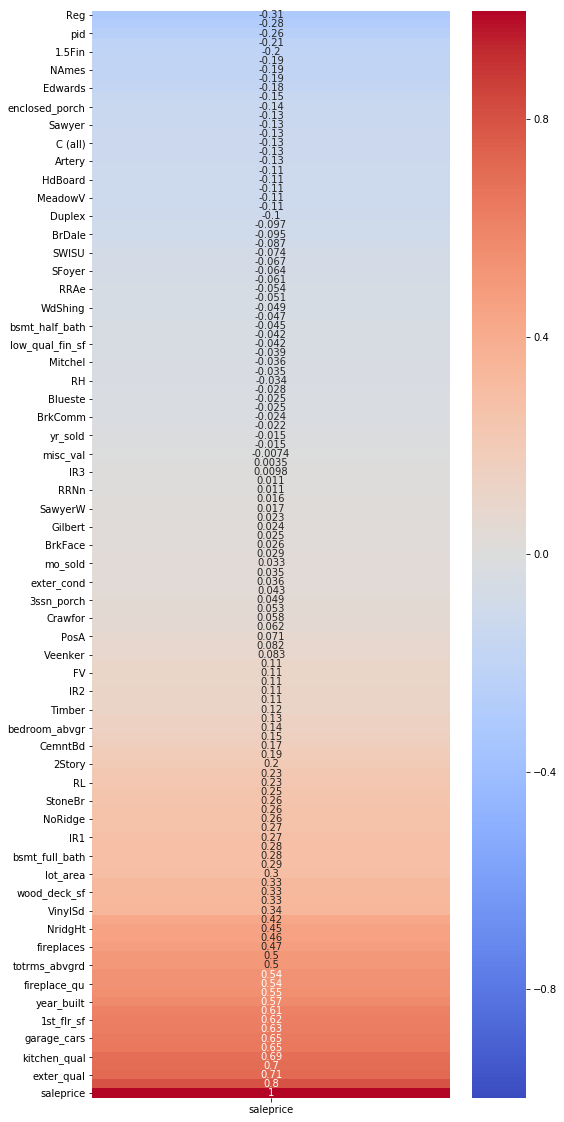

In [367]:
# Let's visulizate the corrlation using the Heat Map after adding all the new features
plt.figure(figsize =(8,20))
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice'), 
            annot=True, 
            cmap='coolwarm',
           vmin =-1);

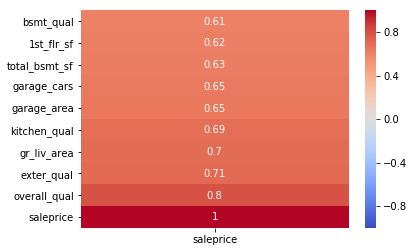

In [369]:
# Correlation After Cleaning the data and addting categorical columns. 
sns.heatmap(df_train.corr()[['saleprice']][df_train.corr()['saleprice'] >= .60].sort_values('saleprice'), 
            annot=True, 
            cmap='coolwarm',
           vmin =-1);

        There are 9 variables now that are above 0.60 correlation with sale price. 
        
        Let's look at how top 3 Corrlated features are related to other features. 

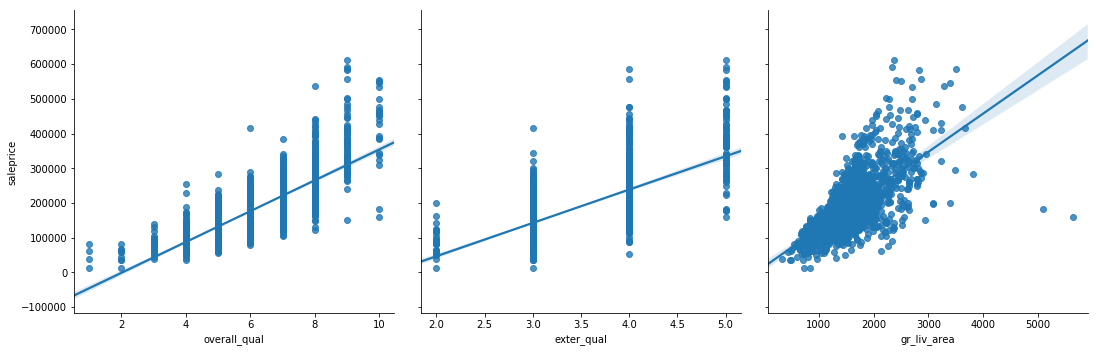

In [370]:
# Pair plot with top 3 high corrlated features 
sns.pairplot(df_train,
             height=5,
             x_vars=['overall_qual','exter_qual','gr_liv_area'], y_vars=['saleprice'],
            kind ='reg');

    Let's Look at what is correlated with top 3 Correlated features. 

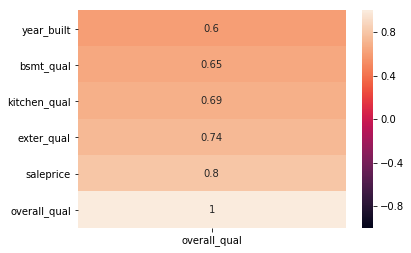

In [374]:
sns.heatmap(df_train.corr()[['overall_qual']][df_train.corr()['overall_qual'] >= .6].sort_values('overall_qual'), 
            annot=True, 
           vmin =-1);

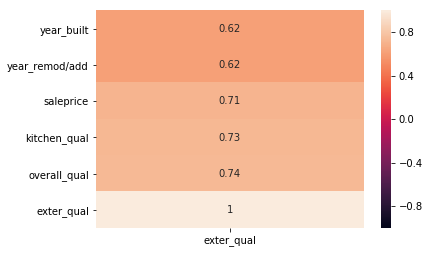

In [375]:
sns.heatmap(df_train.corr()[['exter_qual']][df_train.corr()['exter_qual'] >= .6].sort_values('exter_qual'), 
            annot=True, 
           vmin =-1);

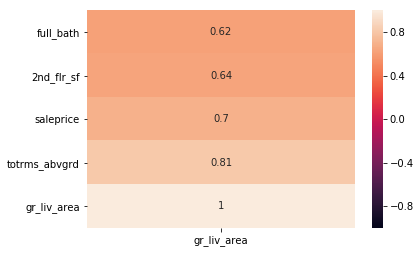

In [373]:
sns.heatmap(df_train.corr()[['gr_liv_area']][df_train.corr()['gr_liv_area'] >= .6].sort_values('gr_liv_area'), 
            annot=True,
           vmin =-1);

    Everything looking good, let's get to modeling. 


#### Feature matrix and target matrix 

In [383]:
baseline = df_train['saleprice'].mean()
baseline

181469.70160897123

In [384]:
feature_list = [col for col in df_train._get_numeric_data().columns if col != 'saleprice']

In [385]:
X = df_train[feature_list]
y = df_train['saleprice']

#### Test Train split

In [386]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state =42)

#### Scalling

In [387]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

#### Linear Regression 

In [388]:
lr = LinearRegression()

In [389]:
cross_val_score(lr, X_train_sc, y_train, cv=5)

array([-1.72429208e+18,  8.45456346e-01,  7.76405334e-01, -2.64931489e+10,
       -4.85818734e+18])

In [390]:
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

-1.3164958902465444e+18

#### Lasso

In [391]:
lasso = LassoCV(cv =5)

In [392]:
cross_val_score(lasso, X_train_sc, y_train, cv=5)

array([0.87409814, 0.85699233, 0.81343901, 0.82761016, 0.68029606])

In [393]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.8104871414046286

#### Ridge

In [394]:
ridge = RidgeCV(cv =5)

In [395]:
cross_val_score(ridge, X_train_sc, y_train, cv=5)

array([0.8778016 , 0.85316718, 0.80832828, 0.82569123, 0.67220264])

In [396]:
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

0.8074381849508917

    Looking at all 3 cross val scores, Lasso is best at 81 percent.

In [397]:
lasso.fit(X_train_sc, y_train)
lasso.score(X_train_sc, y_train)

0.8782971601136301

In [398]:
lasso_preds = lasso.predict(X_test_sc)

In [399]:
lasso.score(X_test_sc, y_test)

0.8872498258707872

In [400]:
lasso_preds_train = lasso.predict(X_train_sc)

### R2 Score

In [401]:
r2_score(y_train,lasso_preds_train)

0.8782971601136301

In [402]:
r2_score(y_test,lasso_preds)

0.8872498258707872

In [403]:
X_scaller = ss.transform(X)
preds = lasso.predict(X_scaller) 

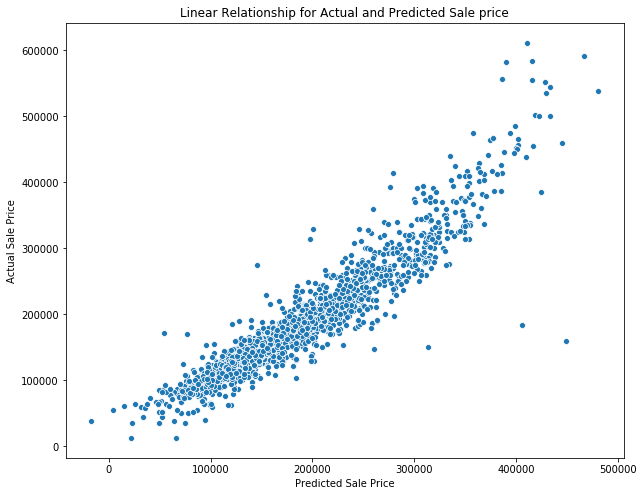

In [404]:
plt.figure(figsize=(10,8))
sns.scatterplot(preds, y)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Linear Relationship for Actual and Predicted Sale price');

In [413]:
# For Kaggle Competition 

In [405]:
X_comp = df_test[feature_list]

In [406]:
X_comp = ss.transform(X_comp)

In [407]:
comp_preds = lasso.predict(X_comp)

In [408]:
df_test['Preds'] = comp_preds

In [409]:
comp_subm = pd.DataFrame({'Id': df_test['id'], 'SalePrice': df_test['Preds']})

In [410]:
comp_subm.head()

,Id,SalePrice
0,2658,124764.703479
1,2718,160424.715506
2,2414,221899.255963
3,1989,120956.164081
4,625,194387.812865


In [411]:
comp_subm.to_csv('subm17.csv',index = False)

#### OLS summary

In [354]:
import statsmodels.api as sm

model = sm.OLS(y,X).fit()

In [355]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 01 Jul 2019   Prob (F-statistic):               0.00
Time:                        04:56:30   Log-Likelihood:                -23753.
No. Observations:                2051   AIC:                         4.773e+04
Df Residuals:                    1937   BIC:                         4.838e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
id                 -2.9533      8.838     -0.334      0.738     -20.287      14.380
pid             -2.078e-06   1.08e-05     -0.193      0.847   -2.32e-05    1.91e-05
ms_subclass      -120.7150     69.998     -1.725      0.085    -257.994      16.564
lot_frontage      -73.5257     39.631     -1.855      0.064    -151.250       4.199
lot_area            0.4842      0.120      4.032      0.000       0.249       0.720
overall_qual     9691.5200    896.669     10.808      0.000    7932.982    1.15e+04
overall_cond     5073.2368    763.836      6.642      0.000    3575.209    6571.265
year_built        229.9264     59.362      3.873      0.000     113.506     346.347
year_remod/add      9.8050     49.827      0.197      0.844     -87.916     107.526
mas_vnr_area       24.9057      4.502      5.532      0.000      16.076      33.735
exter_qual       1.123e+04   1938.191      5.792      0.000    7425.707     1.5e+04
exter_cond      -2334.0938   1876.546     -1.244      0.214   -6014.356    1346.169
bsmt_qual        5863.5999   1454.107      4.032      0.000    3011.821    8715.379
bsmt_cond       -3479.5230   1685.126     -2.065      0.039   -6784.374    -174.672
bsmtfin_sf_1     1.084e+06   2.77e+06      0.392      0.695   -4.35e+06    6.51e+06
bsmtfin_sf_2     1.084e+06   2.77e+06      0.392      0.695   -4.35e+06    6.51e+06
bsmt_unf_sf      1.084e+06   2.77e+06      0.392      0.695   -4.35e+06    6.51e+06
total_bsmt_sf   -1.084e+06   2.77e+06     -0.392      0.695   -6.51e+06    4.35e+06
heating_qc       1326.8350    852.757      1.556      0.120    -345.584    2999.253
1st_flr_sf         15.8583      4.706      3.370      0.001       6.628      25.088
2nd_flr_sf         17.0136      4.227      4.025      0.000       8.723      25.304
low_qual_fin_sf    -2.2566     10.135     -0.223      0.824     -22.133      17.619
gr_liv_area        30.5675      4.275      7.151      0.000      22.184      38.951
bsmt_full_bath   6950.1596   1727.612      4.023      0.000    3561.985    1.03e+04
bsmt_half_bath    257.3315   2630.893      0.098      0.922   -4902.348    5417.011
full_bath        3517.3376   1918.341      1.834      0.067    -244.893    7279.568
half_bath        3784.2900   1873.190      2.020      0.043     110.609    7457.971
bedroom_abvgr   -2213.0621   1177.665     -1.879      0.060   -4522.686      96.562
kitchen_abvgr   -6509.2184   5402.015     -1.205      0.228   -1.71e+04    4085.157
kitchen_qual     8787.0720   1509.872      5.820      0.000    5825.927    1.17e+04
totrms_abvgrd    1573.5509    846.231      1.859      0.063     -86.068    3233.170
fireplaces       2491.9770   2107.880      1.182      0.237   -1641.976    6625.930
fireplace_qu      756.6133    747.162      1.013      0.311    -708.713    2221.940
garage_yr_blt     -21.0263      5.403     -3.892      0.000

### Conclusion 

    To undertand sale price of the house, you have to understand features that makes the house. In my model
    my R2 score is about 88%, which is preety good score for the model and it shows good prediction for the sale
    price. 
    
  